In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
name='BetaClassif_D'
device = 'cuda:0'
from BeatClassifier import BeatClassifier

# Total train loss tracking

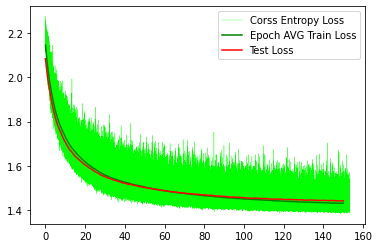

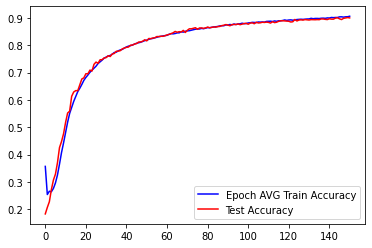

151.0


In [5]:
loss_track = pd.read_csv('Model/{}_total_loss_track.csv'.format(name), sep=';', header=None).to_numpy()
x = np.arange(loss_track.shape[0]) / 875
plt.plot(x, loss_track[:, 2], c='lime', label='Corss Entropy Loss', linewidth=0.3)

# Epoch loss:
e_track = pd.read_csv('Model/{}-LearningTrack.csv'.format(name), sep=';', header=None).to_numpy()
#x_e = (np.arange(e_track.shape[0]) * 1167) + 600
x_e = np.arange(e_track.shape[0])
# Loss: 
plt.plot(x_e, e_track[:, 1], color='green', label='Epoch AVG Train Loss')
plt.plot(x_e, e_track[:, 3], color='red', label='Test Loss')


#plt.yscale('log')
plt.legend()
plt.show()
plt.close()

plt.plot(x_e, e_track[:, 2], color='blue', label='Epoch AVG Train Accuracy')
plt.plot(x_e, e_track[:, 4], color='red', label='Test Accuracy')
plt.legend()
plt.show()
plt.close()

# double scale
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.plot(x, loss_track[:, 2], c='lime', label='Corss Entropy Loss', linewidth=0.3)
ax1.plot(x_e, e_track[:, 1], color='yellow', label='Epoch AVG Train Loss')
ax1.plot(x_e, e_track[:, 3], color='blue', label='Test Loss')
#ax1.legend()

ax2 = ax1.twinx()

ax2.set_ylabel('Accuracy')
ax2.plot(x_e, e_track[:, 2], color='blue', label='Epoch AVG Train Accuracy')
ax2.plot(x_e, e_track[:, 4], color='red', label='Test Accuracy')
ax2.plot([], [], color='lime', label='Cross Entropy Loss')
ax2.plot([], [], color='yellow', label='Epoch AVG Train Loss')
ax2.plot([], [], color='blue', label='Test Loss')
ax2.plot([], [], color='black', label='Epoch change', linestyle='--', linewidth=0.3)
ax2.legend(loc='center right')


tmp = 0
for i in range(loss_track.shape[0]):
    if loss_track[i, 0] != tmp:
            tmp = loss_track[i, 0]
            ax2.axvline(x=tmp, c='black', label='Epoch Change', linestyle='--', linewidth=0.3)
print(tmp)
fig.tight_layout()
#plt.savefig('figs/Training_track.png')
plt.show()
plt.close()



# Epoch loss tracking

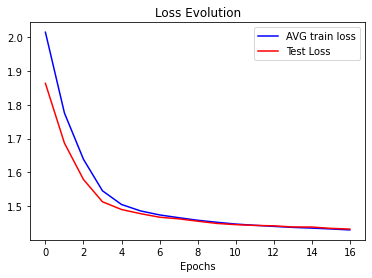

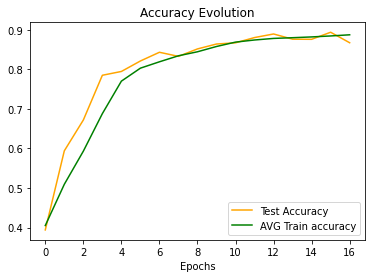

In [3]:
e_track = pd.read_csv('Model/{}-LearningTrack.csv'.format(name), sep=';', header=None).to_numpy()
x = range(e_track.shape[0])
plt.plot(x, e_track[:, 1], c='blue', label='AVG train loss')
plt.plot(x, e_track[:, 3], c='red', label='Test Loss')
plt.title('Loss Evolution')
plt.legend()
plt.xlabel('Epochs')
plt.show()
plt.close()

plt.plot(x, e_track[:, 4], c='Orange', label='Test Accuracy')
plt.plot(x, e_track[:, 2], c='green', label='AVG Train accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.show()
plt.close()


# Test On MIT

In [4]:
model = BeatClassifier(name=name).to(device)
model.restore(epoch=16)

Successfully restore model BetaClassif_C at epoch 16


In [5]:
# Load MIT file
import wfdb
import Utils
file_path = 'D:/ECG/mit/231'
signal = wfdb.rdrecord(file_path)
signal = signal.p_signal.T
signal = Utils.filtering(signal, freq_adapter=True)
#signal *= 1000

In [6]:
# Load annotations
mit_annot = wfdb.rdann(file_path, 'atr')
# Get annotation idx
mit_idx = mit_annot.sample
# Resample
mit_idx = (mit_idx / 360) * 250
mit_idx = mit_idx.astype(int)
# Get symbols
mit_sym = mit_annot.symbol

# Get final beats annotation arrays
mit_beat_idx = []
mit_beat_sym = []
for i in range(len(mit_idx)):
    tmp_sym = mit_sym[i]
    tmp_idx = mit_idx[i]
    for itm in model.classes:
        if tmp_sym in itm:
            mit_beat_idx.append(tmp_idx)
            mit_beat_sym.append(itm)
            break

for i in range(10):
    print('{} - {}'.format(mit_beat_idx[i], mit_beat_sym[i]))
    
            

125 - R
365 - R
588 - R
809 - R
1050 - R
1272 - R
1708 - R
1936 - R
2144 - R
2375 - R


# Annot by the model 

In [7]:
symbols, probs = model.annot(signal, mit_beat_idx, batch_size=200)



In [8]:
for i in range(1, len(mit_beat_sym)):
    print('mit: {} - pred: {} '.format(mit_beat_sym[i], symbols[i]))

mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: N 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - pred: R 
mit: R - p